In [1]:
'''
Author: David Brin
Date Created: 10/9/2024

This notebook is for comparing findings for plate D across recording days, comparing findings at different time points
Comparing firing rates, spiking activity 
'''

'\nAuthor: David Brin\nDate Created: 10/9/2024\n\nThis notebook is for comparing findings for plate D across recording days, comparing findings at different time points\nComparing firing rates, spiking activity \n'

In [2]:
%run "../General_LFP_analysis_functions.py"

C:\Users\david\Documents\Voytek Research\psychedelic_organoids\General_LFP_analysis_functions.py:50: DeprecationWarning: 
The `fooof` package is being deprecated and replaced by the `specparam` (spectral parameterization) package.
This version of `fooof` (1.1) is fully functional, but will not be further updated.
New projects are recommended to update to using `specparam` (see Changelog for details).
  from fooof import FOOOF


## Data

In [3]:
lfp_data0 = load_lfp(r"C:\Users\david\Documents\Voytek Research\LFP_psych_proj\PlateD\d-1\lfp_data.h5")
spike_times0 = load_spikes(r"C:\Users\david\Documents\Voytek Research\LFP_psych_proj\PlateD\d-1\spike_data.mat")
fm_array0 = set_fm_array(lfp_data0, fmode = "fixed")
lfp_data1 = load_lfp(r"C:\Users\david\Documents\Voytek Research\LFP_psych_proj\PlateD\d0\lfp_data.h5")
spike_times1 = load_spikes(r"C:\Users\david\Documents\Voytek Research\LFP_psych_proj\PlateD\d0\spike_data.mat")
fm_array1 = set_fm_array(lfp_data1, fmode = "fixed")
lfp_data2 = load_lfp(r"C:\Users\david\Documents\Voytek Research\LFP_psych_proj\PlateD\d1\lfp_data.h5")
spike_times2 = load_spikes(r"C:\Users\david\Documents\Voytek Research\LFP_psych_proj\PlateD\d1\spike_data.mat")
fm_array2 = set_fm_array(lfp_data2, fmode = "fixed")
lfp_data3 = load_lfp(r"C:\Users\david\Documents\Voytek Research\LFP_psych_proj\PlateD\d4\lfp_data.h5")
spike_times3 = load_spikes(r"C:\Users\david\Documents\Voytek Research\LFP_psych_proj\PlateD\d4\spike_data.mat")
fm_array3 = set_fm_array(lfp_data3, fmode = "fixed")
lfp_data4 = load_lfp(r"C:\Users\david\Documents\Voytek Research\LFP_psych_proj\PlateD\d6\lfp_data.h5")
spike_times4 = load_spikes(r"C:\Users\david\Documents\Voytek Research\LFP_psych_proj\PlateD\d6\spike_data.mat")
fm_array4 = set_fm_array(lfp_data4, fmode = "fixed")
lfp_data5 = load_lfp(r"C:\Users\david\Documents\Voytek Research\LFP_psych_proj\PlateD\d8\lfp_data.h5")
spike_times5 = load_spikes(r"C:\Users\david\Documents\Voytek Research\LFP_psych_proj\PlateD\d8\spike_data.mat")
fm_array5 = set_fm_array(lfp_data5, fmode = "fixed")
lfp_data6 = load_lfp(r"C:\Users\david\Documents\Voytek Research\LFP_psych_proj\PlateD\d12\lfp_data.h5")
spike_times6 = load_spikes(r"C:\Users\david\Documents\Voytek Research\LFP_psych_proj\PlateD\d12\spike_data.mat")
fm_array6 = set_fm_array(lfp_data6 , fmode = "fixed")
lfp_data7 = load_lfp(r"C:\Users\david\Documents\Voytek Research\LFP_psych_proj\PlateD\d20\lfp_data.h5")
spike_times7 = load_spikes(r"C:\Users\david\Documents\Voytek Research\LFP_psych_proj\PlateD\d20\spike_data.mat")
fm_array7 = set_fm_array(lfp_data7, fmode = "fixed")

(6, 8, 62000)
dict_keys(['__header__', '__version__', '__globals__', 'None', 'spike_times', 'spike_waveforms', '__function_workspace__'])
(6, 8, 61200)
dict_keys(['__header__', '__version__', '__globals__', 'None', 'spike_times', 'spike_waveforms', '__function_workspace__'])
(6, 8, 60000)
dict_keys(['__header__', '__version__', '__globals__', 'None', 'spike_times', 'spike_waveforms', '__function_workspace__'])
(6, 8, 77100)
dict_keys(['__header__', '__version__', '__globals__', 'None', 'spike_times', 'spike_waveforms', '__function_workspace__'])
(6, 8, 60100)
dict_keys(['__header__', '__version__', '__globals__', 'None', 'spike_times', 'spike_waveforms', '__function_workspace__'])
(6, 8, 30425)
dict_keys(['__header__', '__version__', '__globals__', 'None', 'spike_times', 'spike_waveforms', '__function_workspace__'])
(6, 8, 61450)
dict_keys(['__header__', '__version__', '__globals__', 'None', 'spike_times', 'spike_waveforms', '__function_workspace__'])
(6, 8, 88725)
dict_keys(['__header

In [4]:
lfp_datas = [lfp_data0, lfp_data1, lfp_data2, lfp_data3, lfp_data4, lfp_data5, lfp_data6]
spike_timess = [spike_times0, spike_times1, spike_times2, spike_times3, spike_times4, spike_times5, spike_times6]
fm_arrays = [fm_array0, fm_array1, fm_array2, fm_array3, fm_array4, fm_array5, fm_array6]
labels = ["base", "prestim", "d1", "d4", "d6", "d8", "d12", "d20"]

## Comparison functions

In [5]:
def compare_spike_heatmaps_across_files(spike_times_files, rows = 6, cols = 8):
    '''
    Plot side-by-side heatmaps for each spike_times_array from multiple files with a consistent color scale.
    spike_times_files: list of spike_times_array for each file
    '''
    num_files = len(spike_times_files)
    
    # Step 1: Calculate global vmin and vmax
    global_min = np.inf
    global_max = -np.inf

    for spike_times_array in spike_times_files:
        for row in range(rows):
            for col in range(cols):
                if rows == 6:
                    for i in range(4):
                        for j in range(4):
                            if spike_times_array[row, col, i, j] is not None and spike_times_array[row, col, i, j].size > 0:
                                spike_times = spike_times_array[row, col, i, j][0]
                                count = len(spike_times)
                                if count < global_min:
                                    global_min = count
                                if count > global_max:
                                    global_max = count
                else:
                    for i in range(16):
                        for j in range(16):
                            if spike_times_array[row, col, i, j] is not None and spike_times_array[row, col, i, j].size > 0:
                                spike_times = spike_times_array[row, col, i, j][0]
                                count = len(spike_times)
                                if count < global_min:
                                    global_min = count
                                if count > global_max:
                                    global_max = count

    # Step 2: Plot the heatmaps using global vmin and vmax
    fig, axs = plt.subplots(1, num_files, figsize=(num_files * 4, 8))

    for file_idx, spike_times_array in enumerate(spike_times_files):
        heatmap_data = np.zeros((6, 8))

        for row in range(rows):
            for col in range(cols):
                if rows == 6:
                    sub_heatmap_data = np.zeros((4, 4))
                    for i in range(4):
                        for j in range(4):
                            if spike_times_array[row, col, i, j] is not None and spike_times_array[row, col, i, j].size > 0:
                                spike_times = spike_times_array[row, col, i, j][0]
                                sub_heatmap_data[i, j] = len(spike_times)
                    heatmap_data[row, col] = np.sum(sub_heatmap_data)

                else:
                    sub_heatmap_data = np.zeros((16, 16))
                    for i in range(16):
                        for j in range(16):
                            if spike_times_array[row, col, i, j] is not None and spike_times_array[row, col, i, j].size > 0:
                                spike_times = spike_times_array[row, col, i, j][0]
                                sub_heatmap_data[i, j] = len(spike_times)
                    heatmap_data[row, col] = np.sum(sub_heatmap_data)

        # Plot heatmap for each file with consistent scale
        im = axs[file_idx].imshow(heatmap_data, cmap='hot', interpolation='nearest', vmin=global_min, vmax=global_max)
        axs[file_idx].set_title(f'{labels[file_idx]}')
        axs[file_idx].axis('off')
    
    # Step 3: Add a unified colorbar based on the last heatmap (mappable 'im')
    plt.suptitle('Spike Count Heatmap Progression Across Files')
    fig.colorbar(im, ax=axs, label='Number of Spikes', fraction=0.02, pad=0.04)
    plt.show()


In [6]:
def compare_electrode_spike_heatmaps_across_files(spike_times_files, rows = 6, cols = 8):
    '''
    Plot side-by-side heatmaps for each spike_times_array from multiple files with a consistent color scale.
    spike_times_files: list of spike_times_array for each file
    '''
    num_files = len(spike_times_files)
    
    # Step 1: Calculate global vmin and vmax
    global_min = np.inf
    global_max = -np.inf

    for spike_times_array in spike_times_files:
        for row in range(rows):
            for col in range(cols):
                if rows == 6:
                    for i in range(4):
                        for j in range(4):
                            if spike_times_array[row, col, i, j] is not None and spike_times_array[row, col, i, j].size > 0:
                                spike_times = spike_times_array[row, col, i, j][0]
                                count = len(spike_times)
                                if count < global_min:
                                    global_min = count
                                if count > global_max:
                                    global_max = count
                else:
                    for i in range(16):
                        for j in range(16):
                            if spike_times_array[row, col, i, j] is not None and spike_times_array[row, col, i, j].size > 0:
                                spike_times = spike_times_array[row, col, i, j][0]
                                count = len(spike_times)
                                if count < global_min:
                                    global_min = count
                                if count > global_max:
                                    global_max = count
            

    fig, axs = plt.subplots(1, num_files, figsize=(num_files * 6, 20))

    for file_idx, spike_times_array in enumerate(spike_times_files):
        # Initialize the subplot for this file
        axarr = axs[file_idx]
        combined_heatmap = np.zeros((24, 32))  # For combining 4x4 into larger heatmap
        
        for row in range(rows):
            for col in range(cols):
                # Initialize a 4x4 grid to store the number of spikes in each electrode
                if rows == 6:
                    sub_heatmap_data = np.zeros((4, 4))
                    
                    for i in range(4):
                        for j in range(4):
                            # Check if the electrode has data
                            if spike_times_array[row, col, i, j] is not None and spike_times_array[row, col, i, j].size > 0:
                                # Get the spike times for the electrode
                                spike_times = spike_times_array[row, col, i, j][0]
                                # Count the number of spikes and store in the sub-heatmap
                                sub_heatmap_data[i, j] = len(spike_times)
    
                    # Combine sub-heatmaps into a larger one at the correct position
                    combined_heatmap[row*4:(row+1)*4, col*4:(col+1)*4] = sub_heatmap_data
                else:
                    sub_heatmap_data = np.zeros((16, 16))
                    
                    for i in range(16):
                        for j in range(16):
                            # Check if the electrode has data
                            if spike_times_array[row, col, i, j] is not None and spike_times_array[row, col, i, j].size > 0:
                                # Get the spike times for the electrode
                                spike_times = spike_times_array[row, col, i, j][0]
                                # Count the number of spikes and store in the sub-heatmap
                                sub_heatmap_data[i, j] = len(spike_times)
    
                    # Combine sub-heatmaps into a larger one at the correct position
                    combined_heatmap[row*16:(row+1)*16, col*16:(col+1)*16] = sub_heatmap_data

        # Plot the combined heatmap for this file
        im = axarr.imshow(combined_heatmap, cmap='hot', interpolation='bilinear', vmin=global_min, vmax=global_max)
        axarr.set_title(f'{labels[file_idx]}')
        axarr.axis('off')

    fig.colorbar(im, ax=axs, label='Number of Spikes', fraction=0.02, pad=0.04)
    plt.suptitle('Embedded Heatmaps of Spike Counts', fontsize=16)
    plt.show()


In [7]:
def firing_rate_per_well(spike_times_files, lfp_data_files, rows = 6, cols = 8):
    '''
    Plot firing rate per well across multiple files.
    spike_times_files: list of spike_times_array from each file
    lfp_data_files: list of lfp_data corresponding to each file
    '''
    num_files = len(spike_times_files)
    wells_firing_rate = np.zeros((rows, cols, num_files))  # 2x3 grid for wells, across time

    # Loop through each file to calculate the firing rate
    for file_idx, spike_times_array in enumerate(spike_times_files):
        lfp_data = lfp_data_files[file_idx]

        for row in range(rows):
            for col in range(cols):
                total_spikes = 0
                total_duration_sec = len(lfp_data[row, col]) / 100  # assuming 100 Hz sampling rate

                # Sum spikes across all electrodes in the well
                if rows == 6:
                    for i in range(4):
                        for j in range(4):
                            if spike_times_array[row, col, i, j] is not None and len(spike_times_array[row, col, i, j]) > 0:
                                total_spikes += len(spike_times_array[row, col, i, j][0])
    
                    # Compute firing rate
                    firing_rate = total_spikes / total_duration_sec
                    wells_firing_rate[row, col, file_idx] = firing_rate
                else:
                    for i in range(16):
                        for j in range(16):
                            if spike_times_array[row, col, i, j] is not None and len(spike_times_array[row, col, i, j]) > 0:
                                total_spikes += len(spike_times_array[row, col, i, j][0])
    
                    # Compute firing rate
                    firing_rate = total_spikes / total_duration_sec
                    wells_firing_rate[row, col, file_idx] = firing_rate

    # Plotting firing rate for each well over time
    time_points = [f'{labels[i]}' for i in range(num_files)]

    plt.figure(figsize=(12, 8))
    
    for row in range(rows):
        for col in range(cols):
            plt.plot(time_points, wells_firing_rate[row, col, :], label=f'Well {row + 1}-{col + 1}')
    
    plt.xlabel('Time Points')
    plt.ylabel('Firing Rate (spikes/sec)')
    plt.title('Firing Rate per Well Across Time')
    plt.legend()
    plt.show()


In [8]:
def plot_aperiodic_boxplot_across_files(fm_arrays, fmode = "knee", rows = 6, cols = 8):
    '''
    Plots boxplots of aperiodic parameters across different files    
    fm_arrays: list of fm_array for each file.
    '''
    file_labels = []
    aperiodic_param_1_list = []
    aperiodic_param_2_list = []
    aperiodic_param_3_list = []

    # Loop through each file and extract the aperiodic parameters
    for file_idx, fm_array in enumerate(fm_arrays):
        offsets = np.zeros((rows, cols))
        knees = np.zeros((rows, cols))
        exponents = np.zeros((rows, cols))
        
        # Extract aperiodic parameter arrays for each file
        for i in range(rows):
            for j in range(cols):
                if fm_array[i,j] is None:
                    fm_array[i, j] = None
                    continue
                if fmode == "knee": 
                    offsets[i, j] = fm_array[i, j].aperiodic_params_[0]
                    knees[i, j] = fm_array[i, j].aperiodic_params_[1]
                    exponents[i, j] = fm_array[i, j].aperiodic_params_[2]
                    
                else:
                    offsets[i, j] = fm_array[i, j].aperiodic_params_[0]
                    exponents[i, j] = fm_array[i, j].aperiodic_params_[1]
                    
                    

        # Loop through each well in the file and collect data
        for i in range(rows):
            for j in range(cols):
                # Ensure that aperiodic parameters are not None or empty
                if offsets[i, j] is not None and offsets[i, j] != 0 and exponents[i, j] is not None:
                    file_labels.append(f'File {file_idx - 1}')
                    aperiodic_param_1_list.append(offsets[i, j])
                    aperiodic_param_2_list.append(knees[i, j])
                    aperiodic_param_3_list.append(exponents[i, j])
    
    # Create a DataFrame
    if fmode == "knees":
        df = pd.DataFrame({
            'File': file_labels,
            'Offsets': aperiodic_param_1_list,
            'Knees': aperiodic_param_2_list,
            'Exponents': aperiodic_param_3_list
        })
    else:
        df = pd.DataFrame({
            'File': file_labels,
            'Offsets': aperiodic_param_1_list,
            'Exponents': aperiodic_param_3_list
        })
        
    
    # Plotting boxplots for each aperiodic parameter
    plt.figure(figsize=(14, 10))
    if fmode == "knees":
        for idx, param in enumerate(['Offsets', 'Knees', 'Exponents'], 1):
            plt.subplot(1, 3, idx)
            sns.boxplot(x='File', y=param, data=df)
            plt.title(f'{param} by File')
            plt.xlabel('File')
            plt.ylabel(param)
    else:
        for idx, param in enumerate(['Offsets', 'Exponents'], 1):
            plt.subplot(1, 2, idx)
            sns.boxplot(x='File', y=param, data=df)
            plt.title(f'{param} by File')
            plt.xlabel('File')
            plt.ylabel(param)
            
    plt.tight_layout()
    plt.show()


In [9]:
def plot_peak_boxplot_across_files(fm_arrays, n_rows = 6, n_cols = 8):
    '''
    Plots boxplots of aperiodic parameters across different files    
    fm_arrays: list of fm_array for each file.
    '''
    file_labels = []
    n_peaks_list = []
    peak_param_1_list = []
    peak_param_2_list = []
    peak_param_3_list = []

    # Loop through each file and extract the aperiodic parameters
    for file_idx, fm_array in enumerate(fm_arrays):
        n_peaks_grid = np.zeros((n_rows, n_cols))
        peak_freqs_grid = np.zeros((n_rows, n_cols))
        peak_amps_grid = np.zeros((n_rows, n_cols))
        peak_band_grid = np.zeros((n_rows, n_cols))
        
        # Extract aperiodic parameter arrays for each file
        for i in range(n_rows):
            for j in range(n_cols):
                n_peaks = fm_array[i, j].n_peaks_
                if n_peaks > 0:
                    peak_params = fm_array[i, j].peak_params_
                    n_peaks_grid[i, j] = n_peaks
                    peak_freqs_grid[i, j] = np.mean(peak_params[:, 0])  # Frequency
                    peak_amps_grid[i, j] = np.mean(peak_params[:, 1])   # Amplitude
                    peak_band_grid[i, j] = np.mean(peak_params[:, 2])   # bandwith

        # Loop through each well in the file and collect data
        for i in range(n_rows):
            for j in range(n_cols):
                # Ensure that aperiodic parameters are not None or empty
                if peak_freqs_grid[i, j] is not None and peak_amps_grid[i, j] is not None and peak_band_grid[i, j] is not None:
                    file_labels.append(f'{file_idx - 1}')
                    n_peaks_list.append(n_peaks_grid[i, j])
                    peak_param_1_list.append(peak_freqs_grid[i, j])
                    peak_param_2_list.append(peak_amps_grid[i, j])
                    peak_param_3_list.append(peak_band_grid[i, j])
    
    # Create a DataFrame
    df = pd.DataFrame({
        'File': file_labels,
        'N_peaks': n_peaks_list,
        'Frequency': peak_param_1_list,
        'Amplitude': peak_param_2_list,
        'Bandwidth': peak_param_3_list
    })
    
    # Plotting boxplots for each aperiodic parameter
    plt.figure(figsize=(14, 10))
    
    for idx, param in enumerate(['N_peaks', 'Frequency', 'Amplitude', 'Bandwidth'], 1):
        plt.subplot(1, 4, idx)
        sns.boxplot(x='File', y=param, data=df)
        plt.title(f'{param} by File')
        plt.xlabel('File')
        plt.ylabel(param)
    
    plt.tight_layout()
    plt.show()


In [10]:
def compare_param_heatmaps_across_files(fm_arrays, fmode = "knees", rows = 6, cols = 8):
    '''
    Compare heatmaps for aperiodic parameters (offsets, knees, exponents, R-squared values) across multiple files.
    Heatmaps for each parameter will be stacked vertically, and heatmaps from different files will be placed side by side.
    '''
    num_files = len(fm_arrays)

    # Create storage for heatmap data across files
    offsets_list = []
    knees_list = []
    exponents_list = []
    r_squared_values_list = []

    for fm_array in fm_arrays:
        # Extract the 3 aperiodic parameters and R^2 values into separate 6x8 arrays for each file
        offsets = np.zeros((rows, cols))
        knees = np.zeros((rows, cols))
        exponents = np.zeros((rows, cols))
        r_squared_values = np.zeros((rows, cols))

        for i in range(rows):
            for j in range(cols):
                if fmode == "knee":        
                    offsets[i, j] = fm_array[i, j].aperiodic_params_[0]
                    knees[i, j] = fm_array[i, j].aperiodic_params_[1]
                    exponents[i, j] = fm_array[i, j].aperiodic_params_[2]
                    r_squared_values[i, j] = fm_array[i, j].r_squared_
                else:
                    offsets[i, j] = fm_array[i, j].aperiodic_params_[0]
                    exponents[i, j] = fm_array[i, j].aperiodic_params_[1]
                    r_squared_values[i, j] = fm_array[i, j].r_squared_


        
        # Append data to lists
        offsets_list.append(offsets)
        knees_list.append(knees)
        exponents_list.append(exponents)
        r_squared_values_list.append(r_squared_values)

    # Define a function to plot heatmaps for a single parameter across files
    def plot_comparison_heatmap(data_list, title, cbar_label):
        fig, axs = plt.subplots(1, num_files, figsize=(num_files * 6, 6))

        for file_idx, data in enumerate(data_list):
                    
                # Heatmap on the subplots grid
                sns.heatmap(data, annot=True, cmap='viridis', ax=axs[ file_idx], 
                            cbar_kws={'label': cbar_label}, vmin=np.min(data_list), vmax=np.max(data_list))
                axs[ file_idx].set_title(f'{title} {labels[file_idx]}')
                axs[ file_idx].set_xlabel('Well Column')
                axs[ file_idx].set_ylabel('Well Row')

        plt.suptitle(title, fontsize=16)
        plt.tight_layout()
        plt.show()

    # Plot the heatmaps for each parameter across files
    plot_comparison_heatmap(offsets_list, 'Aperiodic Offsets Comparison', 'Offset Values')
    if fmode=="knee": 
        plot_comparison_heatmap(knees_list, 'Aperiodic Knees Comparison', 'Knee Values')
    plot_comparison_heatmap(exponents_list, 'Aperiodic Exponents Comparison', 'Exponent Values')
    plot_comparison_heatmap(r_squared_values_list, 'R-Squared Values Comparison', 'R-Squared')


In [11]:
dose_grid = np.array([
    ['Blank-stim', 'Blank-stim', "Methanol-stim", "Methanol-stim", "20uM_5MeO-stim", "20uM_5MeO-stim", "10uM_5MeO-stim", "10uM_5MeO-stim"],
    ['Blank-stim', 'Blank-stim', "Methanol-stim", "Methanol-stim", "20uM_5MeO-stim", "20uM_5MeO-stim", "10uM_5MeO-stim", "10uM_5MeO-stim"],
    ['Blank-stim', 'Blank-stim', "Methanol-stim", "Methanol-stim", "20uM_5MeO-stim", "20uM_5MeO-stim", "10uM_5MeO-stim", "10uM_5MeO-stim"],
    ['Blank-stim', 'Blank-stim', "Methanol-stim", "Methanol-stim", "20uM_5MeO-stim", "20uM_5MeO-stim", "10uM_5MeO-stim", "10uM_5MeO-stim"],
    ['Blank', 'Blank', "Methanol", "Methanol", "20uM_5MeO", "20uM_5MeO", "10uM_5MeO", "10uM_5MeO"],
    ['Blank', 'Blank', "Methanol", "Methanol", "20uM_5MeO", "20uM_5MeO", "10uM_5MeO", "10uM_5MeO"]])

In [12]:
def plot_aperiodic_boxplot_by_dose(fm_arrays, dose_grid, fmode = "knee", rows = 6, cols = 8):
    """
    Plots boxplots of aperiodic parameters across different files grouped by doses.
    
    Parameters:
        fm_arrays (list of arrays): List of fm_array for each file.
        dose_grid (2D array): 6x8 array representing dose groups by well.
    """
    # Identify unique dose groups from dose_grid
    unique_doses = np.unique(dose_grid)
    
    # Prepare dictionary to hold data for each dose group
    dose_data = {dose: {'file_labels': [], 'offsets': [], 'knees': [], 'exponents': []} for dose in unique_doses}
    
    # Loop through each file and extract the aperiodic parameters by dose
    for file_idx, fm_array in enumerate(fm_arrays):
        for i in range(rows):
            for j in range(cols):
                dose_label = dose_grid[i, j]
                
                if fm_array[i, j] is not None:
                    if fmode == "knee":
                        # Extract aperiodic parameters for this well
                        offset = fm_array[i, j].aperiodic_params_[0]
                        knee = fm_array[i, j].aperiodic_params_[1]
                        exponent = fm_array[i, j].aperiodic_params_[2]

                        # Append data to the corresponding dose group
                        dose_data[dose_label]['file_labels'].append(f'{labels[file_idx]}')
                        dose_data[dose_label]['offsets'].append(offset)
                        dose_data[dose_label]['knees'].append(knee)
                        dose_data[dose_label]['exponents'].append(exponent)
                    else:
                        offset = fm_array[i, j].aperiodic_params_[0]
                        exponent = fm_array[i, j].aperiodic_params_[1]
                        
                        # Append data to the corresponding dose group
                        dose_data[dose_label]['file_labels'].append(f'{labels[file_idx]}')
                        dose_data[dose_label]['offsets'].append(offset)
                        dose_data[dose_label]['exponents'].append(exponent)
                        
                    

    # Plotting boxplots for each unique dose group
    num_params = 3  # offsets, knees, exponents
    plt.figure(figsize=(15, 5 * len(unique_doses)))

    if fmode == "knee":
        for dose_idx, dose in enumerate(unique_doses):
            dose_df = pd.DataFrame({
                'File': dose_data[dose]['file_labels'],
                'Offsets': dose_data[dose]['offsets'],
                'Knees': dose_data[dose]['knees'],
                'Exponents': dose_data[dose]['exponents']
            })
            for idx, param in enumerate(['Offsets', 'Knees', 'Exponents'], 1):
                plt.subplot(len(unique_doses), num_params, dose_idx * num_params + idx)
                sns.boxplot(x='File', y=param, data=dose_df)
                plt.title(f'{param} by File for Dose {dose}')
                plt.xlabel('File')
                plt.ylabel(param)

    else:
        for dose_idx, dose in enumerate(unique_doses):
            dose_df = pd.DataFrame({
                'File': dose_data[dose]['file_labels'],
                'Offsets': dose_data[dose]['offsets'],
                'Exponents': dose_data[dose]['exponents']
            })
            for idx, param in enumerate(['Offsets', 'Exponents'], 1):
                plt.subplot(len(unique_doses), num_params, dose_idx * num_params + idx)
                sns.boxplot(x='File', y=param, data=dose_df)
                plt.title(f'{param} by File for Dose {dose}')
                plt.xlabel('File')
                plt.ylabel(param)
            
        
    
    plt.tight_layout()
    plt.show()


In [13]:
def plot_peak_boxplot_by_dose(fm_arrays, dose_grid, n_rows=6, n_cols=8):
    """
    Plots boxplots of peak parameters across different files grouped by doses.

    Parameters:
        fm_arrays (list of arrays): List of fm_array for each file.
        dose_grid (2D array): 6x8 array representing dose groups by well.
    """
    # Identify unique dose groups from dose_grid
    unique_doses = np.unique(dose_grid)
    
    # Prepare dictionary to hold data for each dose group
    dose_data = {dose: {'file_labels': [], 'n_peaks': [], 'frequencies': [], 'amplitudes': [], 'bandwidths': []} for dose in unique_doses}
    
    # Loop through each file and extract peak parameters by dose
    for file_idx, fm_array in enumerate(fm_arrays):
        for i in range(n_rows):
            for j in range(n_cols):
                dose_label = dose_grid[i, j]

                if fm_array[i, j] is not None and fm_array[i, j].n_peaks_ > 0:
                    peak_params = fm_array[i, j].peak_params_
                    
                    # Extract and average peak parameters
                    frequency = np.mean(peak_params[:, 0])  # Frequency
                    amplitude = np.mean(peak_params[:, 1])  # Amplitude
                    bandwidth = np.mean(peak_params[:, 2])  # Bandwidth
                    
                    # Append data to the corresponding dose group
                    dose_data[dose_label]['file_labels'].append(f'{labels[file_idx]}')
                    dose_data[dose_label]['n_peaks'].append(fm_array[i, j].n_peaks_)
                    dose_data[dose_label]['frequencies'].append(frequency)
                    dose_data[dose_label]['amplitudes'].append(amplitude)
                    dose_data[dose_label]['bandwidths'].append(bandwidth)

    # Plotting boxplots for each unique dose group
    num_params = 4  # N_peaks, Frequency, Amplitude, Bandwidth
    plt.figure(figsize=(15, 5 * len(unique_doses)))

    for dose_idx, dose in enumerate(unique_doses):
        dose_df = pd.DataFrame({
            'File': dose_data[dose]['file_labels'],
            'N_peaks': dose_data[dose]['n_peaks'],
            'Frequency': dose_data[dose]['frequencies'],
            'Amplitude': dose_data[dose]['amplitudes'],
            'Bandwidth': dose_data[dose]['bandwidths']
        })
        
        # Generate boxplots for each peak parameter per dose
        for idx, param in enumerate(['N_peaks', 'Frequency', 'Amplitude', 'Bandwidth'], 1):
            plt.subplot(len(unique_doses), num_params, dose_idx * num_params + idx)
            sns.boxplot(x='File', y=param, data=dose_df)
            plt.title(f'{param} by File for Dose {dose}')
            plt.xlabel('File')
            plt.ylabel(param)

    plt.tight_layout()
    plt.show()


In [14]:
def plot_consolidated_by_dose(fm_arrays, dose_grid, fmode="knee", rows=6, cols=8):
    """
    Plots boxplots of aperiodic parameters across different files grouped by doses.
    
    Parameters:
        fm_arrays (list of arrays): List of fm_array for each file.
        dose_grid (2D array): 6x8 array representing dose groups by well.
        fmode (str): Mode for selecting parameters ("knee" includes offset, knee, exponent; otherwise offset and exponent).
        rows (int): Number of rows in each file (default 6).
        cols (int): Number of columns in each file (default 8).
    """
    # Identify unique dose groups from dose_grid
    unique_doses = np.unique(dose_grid)
    
    # Define colors for doses
    colors = sns.color_palette("Set2", len(unique_doses))
    dose_colors = {dose: colors[i] for i, dose in enumerate(unique_doses)}
    
    # Prepare dictionary to hold data for each dose group
    dose_data = {dose: {'file_labels': [], 'offsets': [], 'knees': [], 'exponents': []} for dose in unique_doses}
    
    # Loop through each file and extract the aperiodic parameters by dose
    labels = [f"File {i+1}" for i in range(len(fm_arrays))]
    for file_idx, fm_array in enumerate(fm_arrays):
        for i in range(rows):
            for j in range(cols):
                dose_label = dose_grid[i, j]
                
                if fm_array[i, j] is not None:
                    offset = fm_array[i, j].aperiodic_params_[0]
                    exponent = fm_array[i, j].aperiodic_params_[1]
                    
                    if fmode == "knee" and len(fm_array[i, j].aperiodic_params_) > 2:
                        knee = fm_array[i, j].aperiodic_params_[2]
                        dose_data[dose_label]['knees'].append(knee)
                    else:
                        dose_data[dose_label]['knees'].append(np.nan)  # Use NaN to handle missing knees
                    
                    # Append data to the corresponding dose group
                    dose_data[dose_label]['file_labels'].append(labels[file_idx])
                    dose_data[dose_label]['offsets'].append(offset)
                    dose_data[dose_label]['exponents'].append(exponent)

    # Plotting boxplots for each parameter
    params = ['offsets', 'knees', 'exponents'] if fmode == "knee" else ['offsets', 'exponents']
    num_params = len(params)
    fig, axs = plt.subplots(num_params, 1, figsize=(15, 5 * num_params), sharex=True)
    
    for idx, param in enumerate(params):
        ax = axs[idx]
        
        # Collect data for the current parameter into a DataFrame
        plot_data = []
        for dose in unique_doses:
            dose_df = pd.DataFrame({
                'File': dose_data[dose]['file_labels'],
                param.capitalize(): dose_data[dose][param]
            })
            dose_df['Dose'] = dose
            plot_data.append(dose_df)
        
        combined_df = pd.concat(plot_data, ignore_index=True)
        
        # Draw the boxplot for the parameter
        sns.boxplot(x='File', y=param.capitalize(), hue='Dose', data=combined_df, palette=dose_colors, ax=ax, boxprops={})
        ax.set_title(f'{param.capitalize()} across Files and Doses')
        ax.set_ylabel(param.capitalize())
        ax.grid(True, linestyle='--', alpha=0.6)

    # Finalize layout
    handles = [plt.Line2D([0], [0], color=color, lw=4) for color in colors]
    fig.legend(handles, unique_doses, title="Doses", loc="upper right", bbox_to_anchor=(1.1, 0.5))
    
    plt.xlabel("File Progression")
    plt.tight_layout()
    plt.show()

## Plots

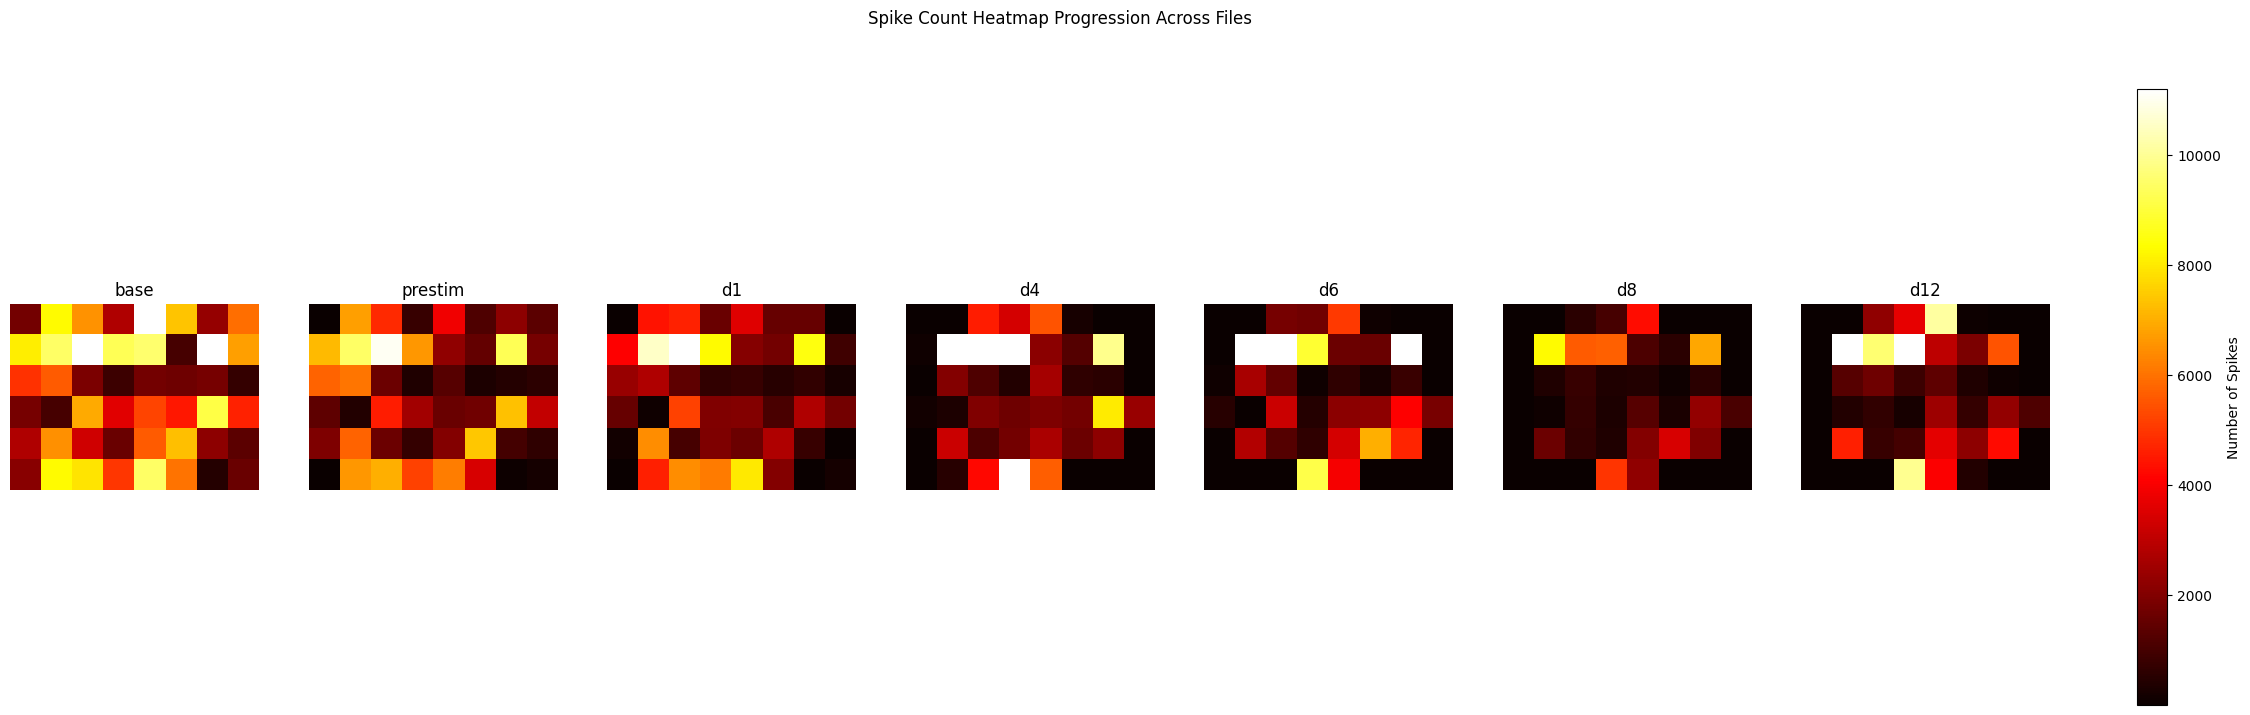

In [15]:
compare_spike_heatmaps_across_files(spike_timess)

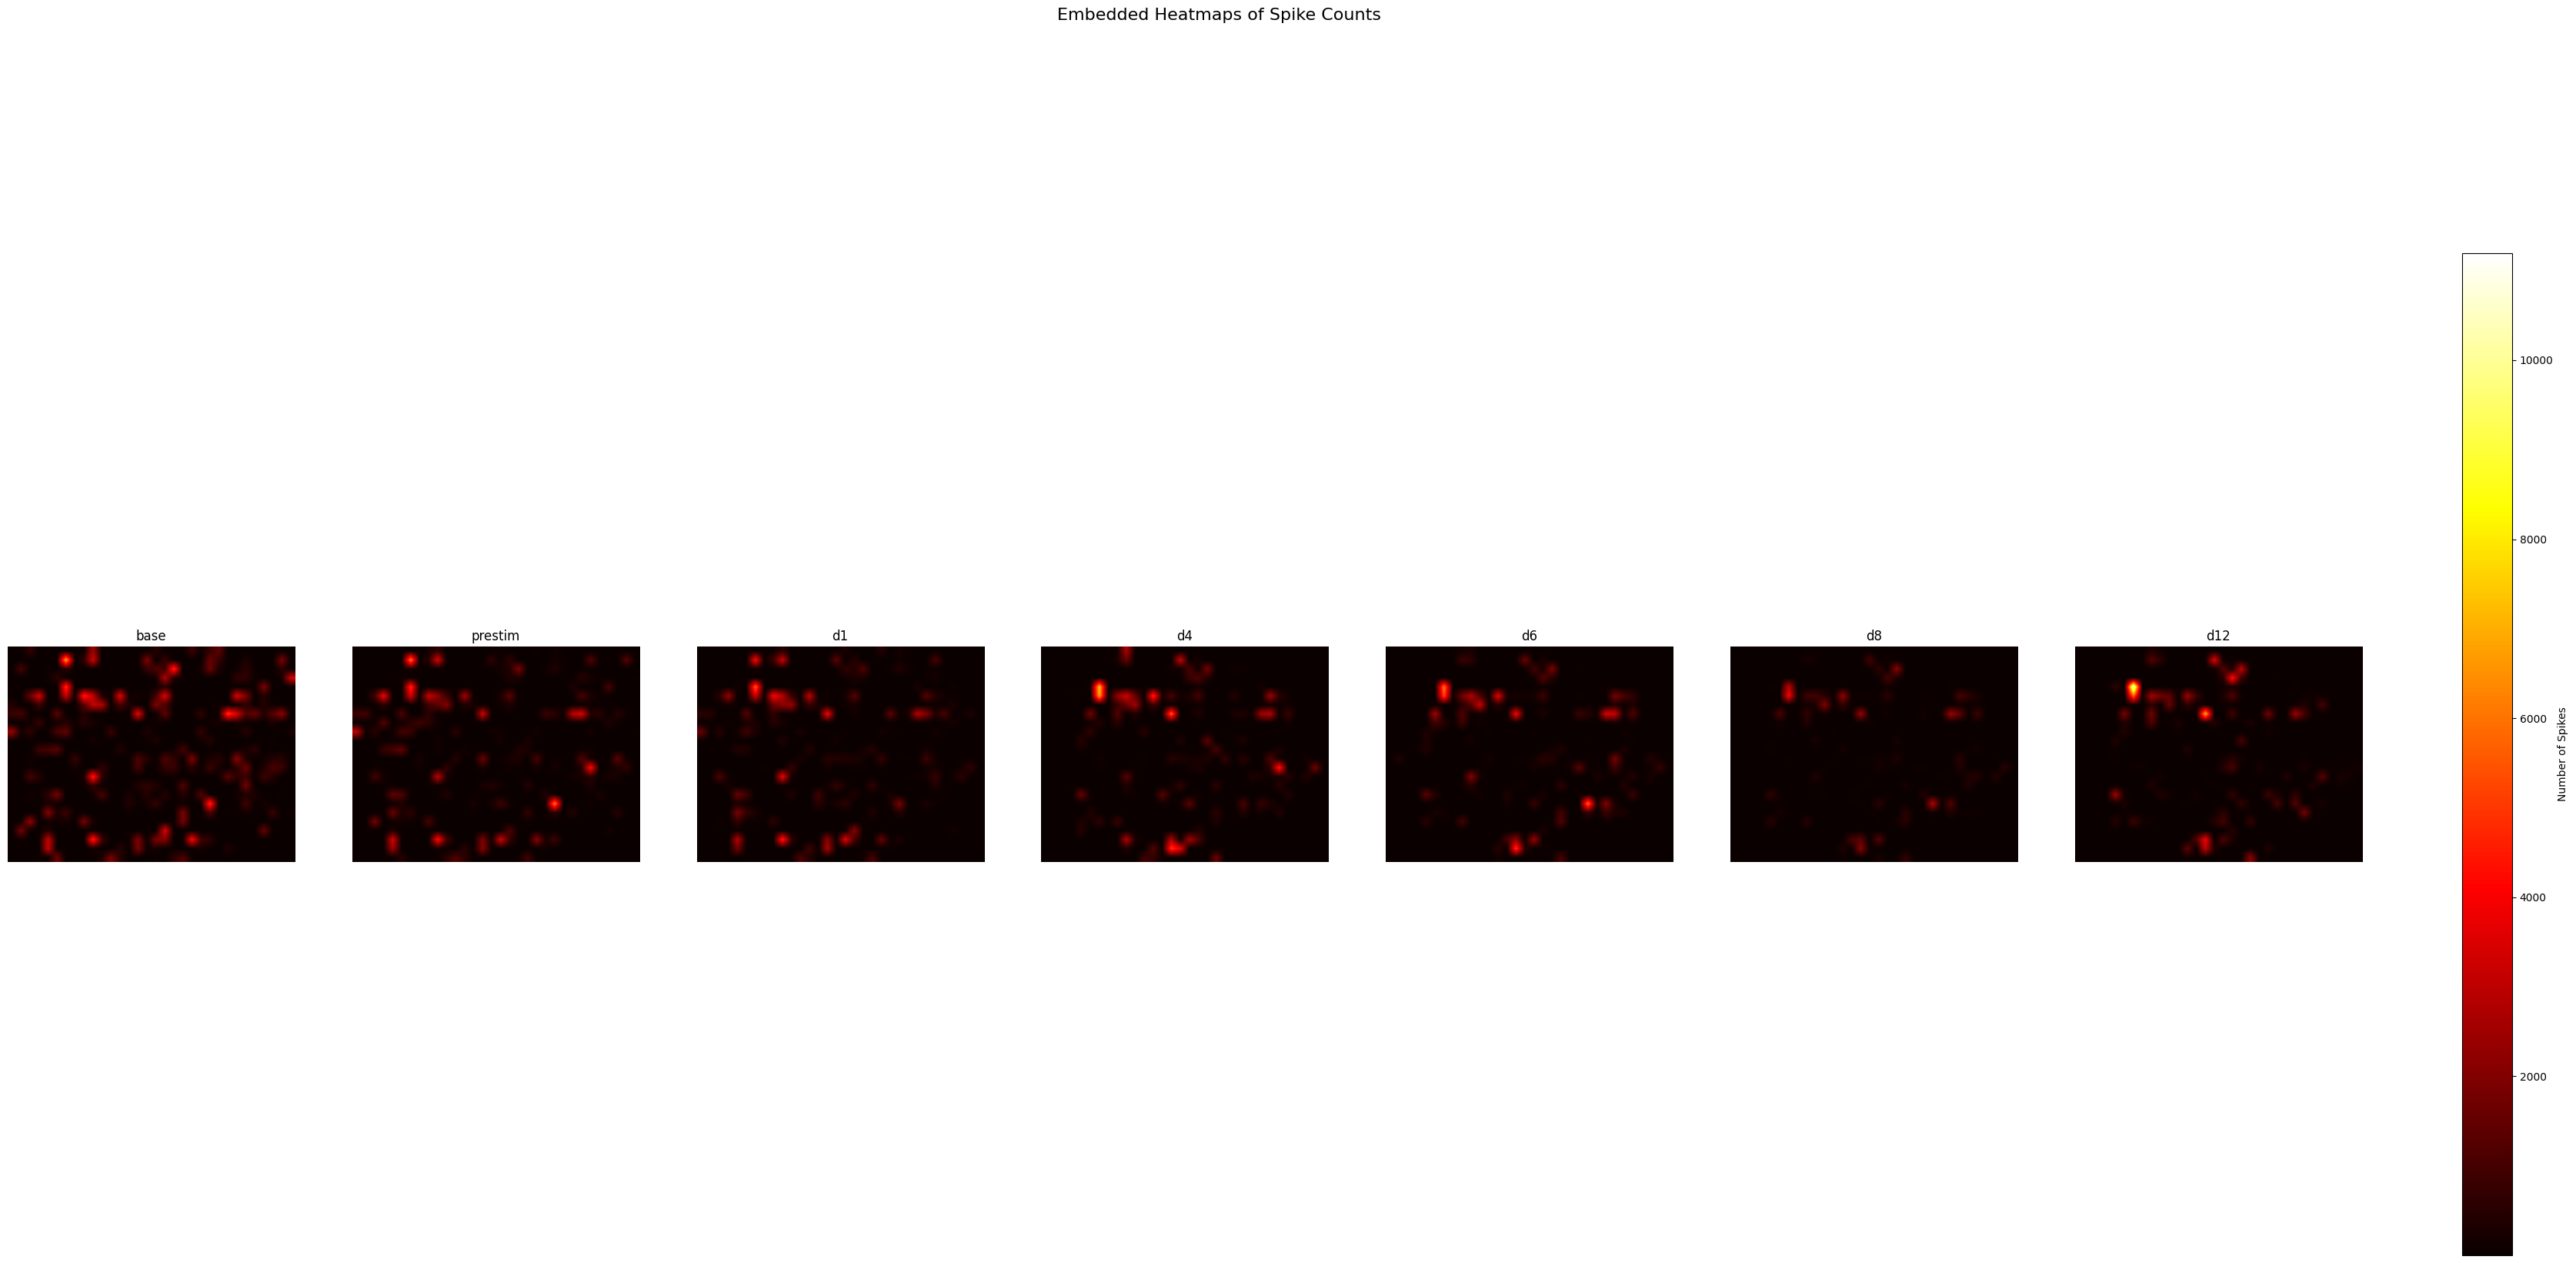

In [16]:
compare_electrode_spike_heatmaps_across_files(spike_timess)

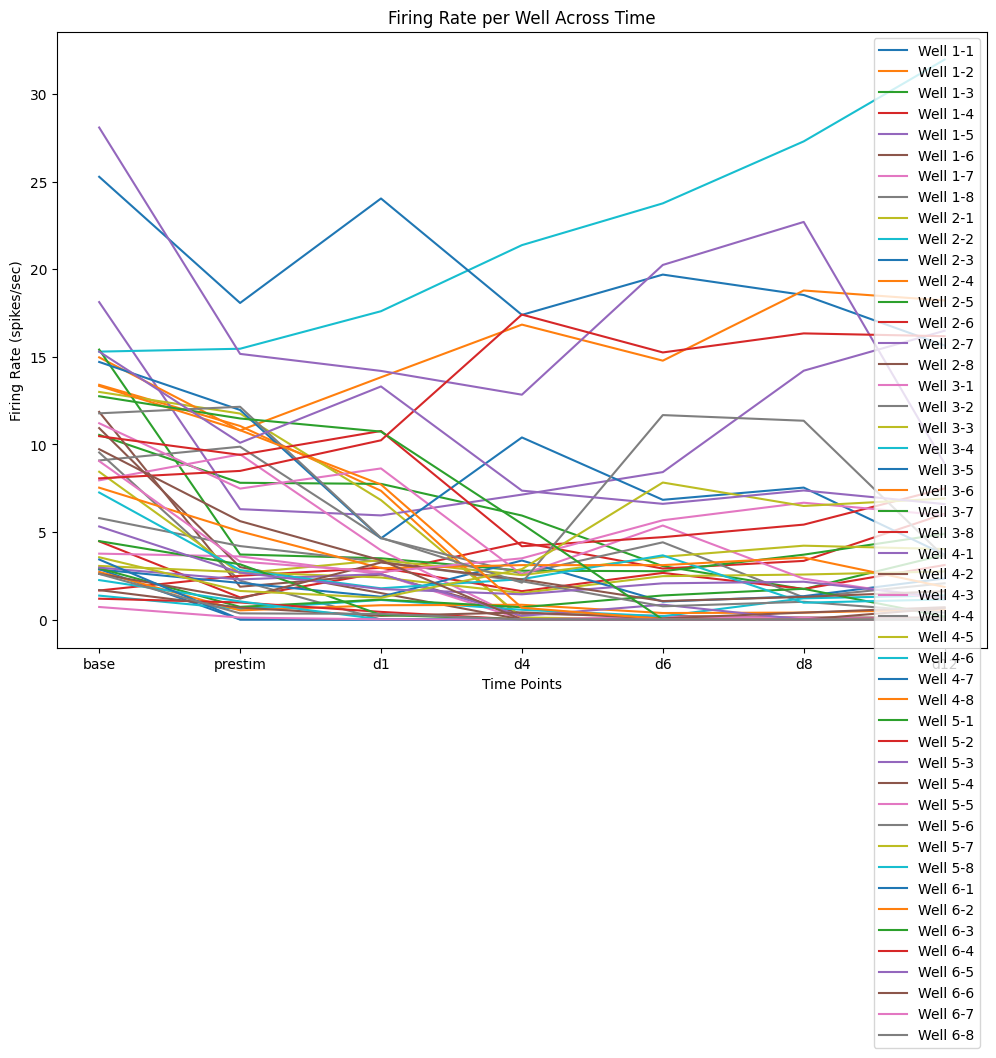

In [17]:
firing_rate_per_well(spike_timess, lfp_datas) # (none-zero)

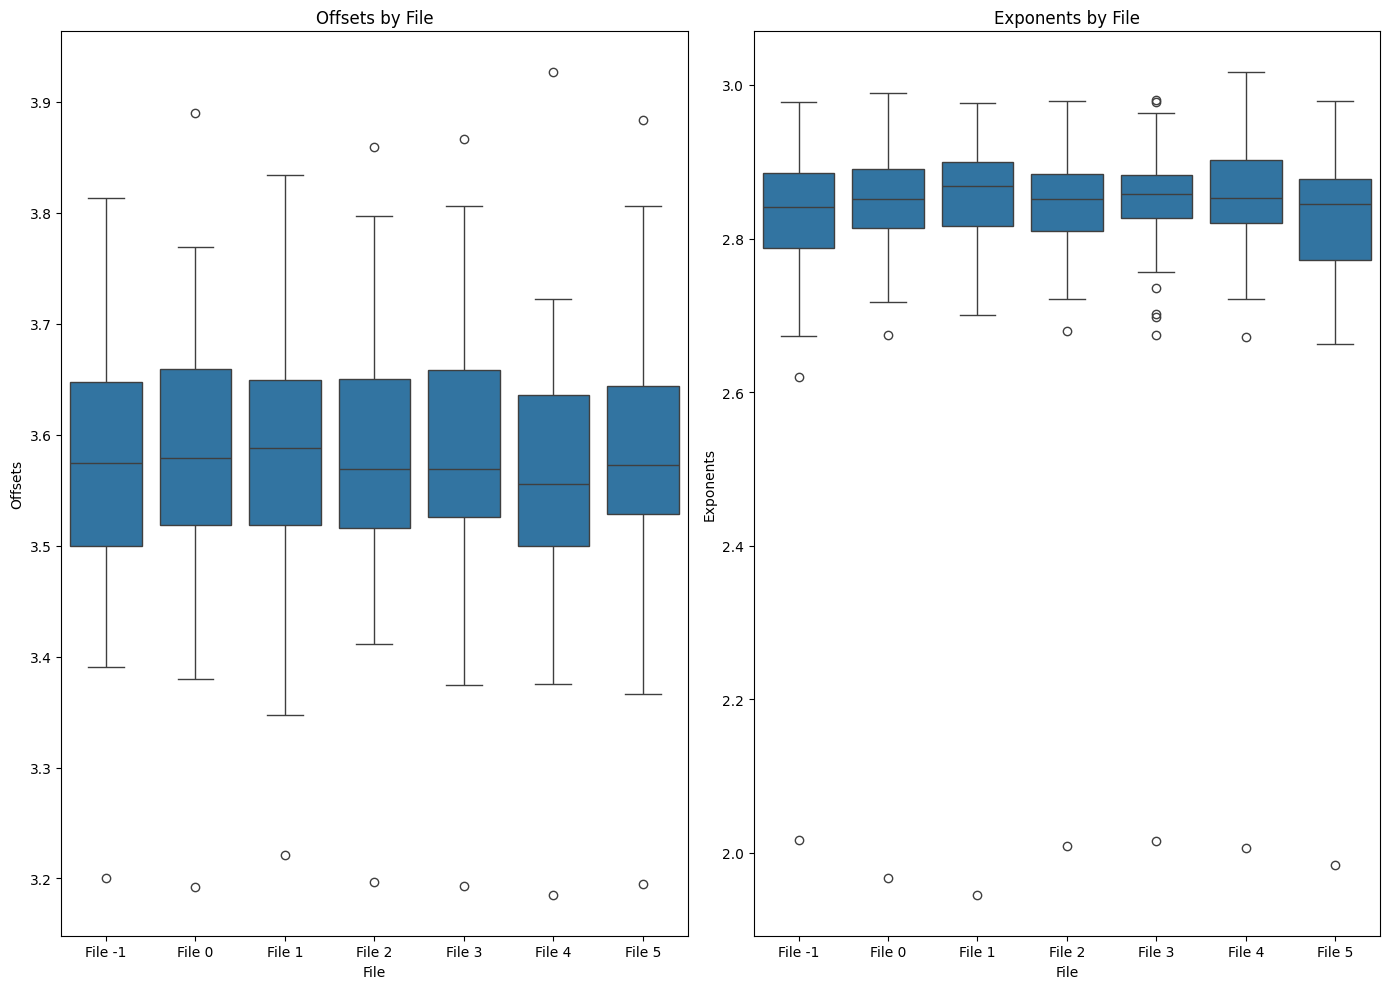

In [18]:
plot_aperiodic_boxplot_across_files(fm_arrays, fmode = "fixed")

In [19]:
ofm_array0 = set_fm_array_one_outlier(lfp_data0, indices = [5, 4])
ofm_array1 = set_fm_array_one_outlier(lfp_data1, indices = [5, 4])
ofm_array2 = set_fm_array_one_outlier(lfp_data2, indices = [5, 4])
ofm_array3 = set_fm_array_one_outlier(lfp_data3, indices = [5, 4])
ofm_array4 = set_fm_array_one_outlier(lfp_data4, indices = [5, 4])
ofm_array5 = set_fm_array_one_outlier(lfp_data5, indices = [5, 4])
ofm_array6 = set_fm_array_one_outlier(lfp_data6, indices = [5, 4])
ofm_array7 = set_fm_array_one_outlier(lfp_data7, indices = [5, 4])
ofm_arrays = [ofm_array0, ofm_array1, ofm_array2, ofm_array3, ofm_array4, ofm_array5, ofm_array6, ofm_array7]



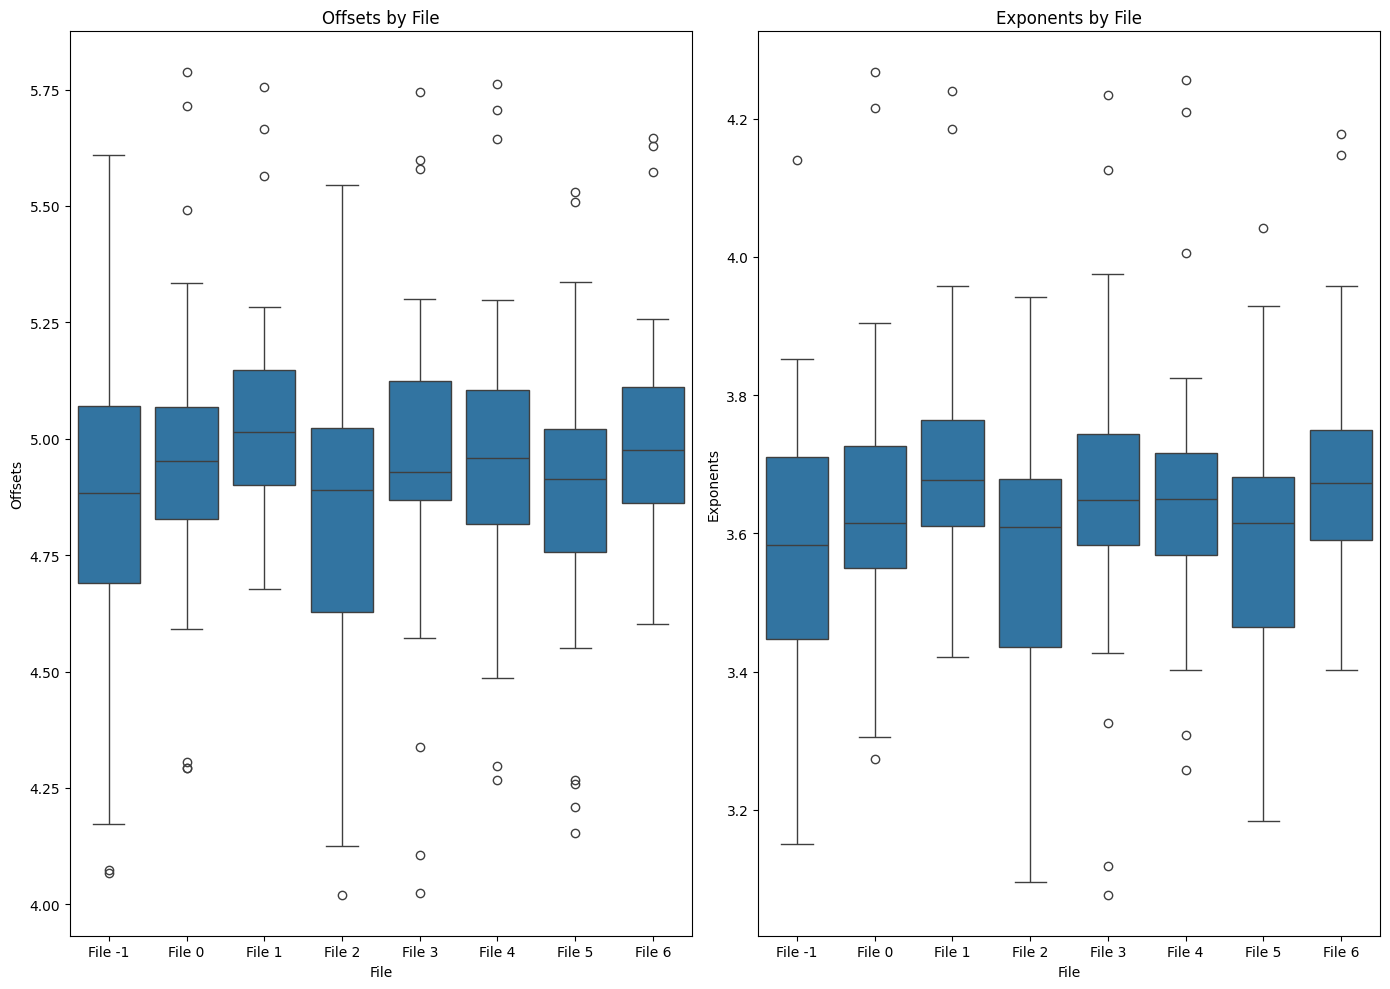

In [20]:
plot_aperiodic_boxplot_across_files(ofm_arrays)

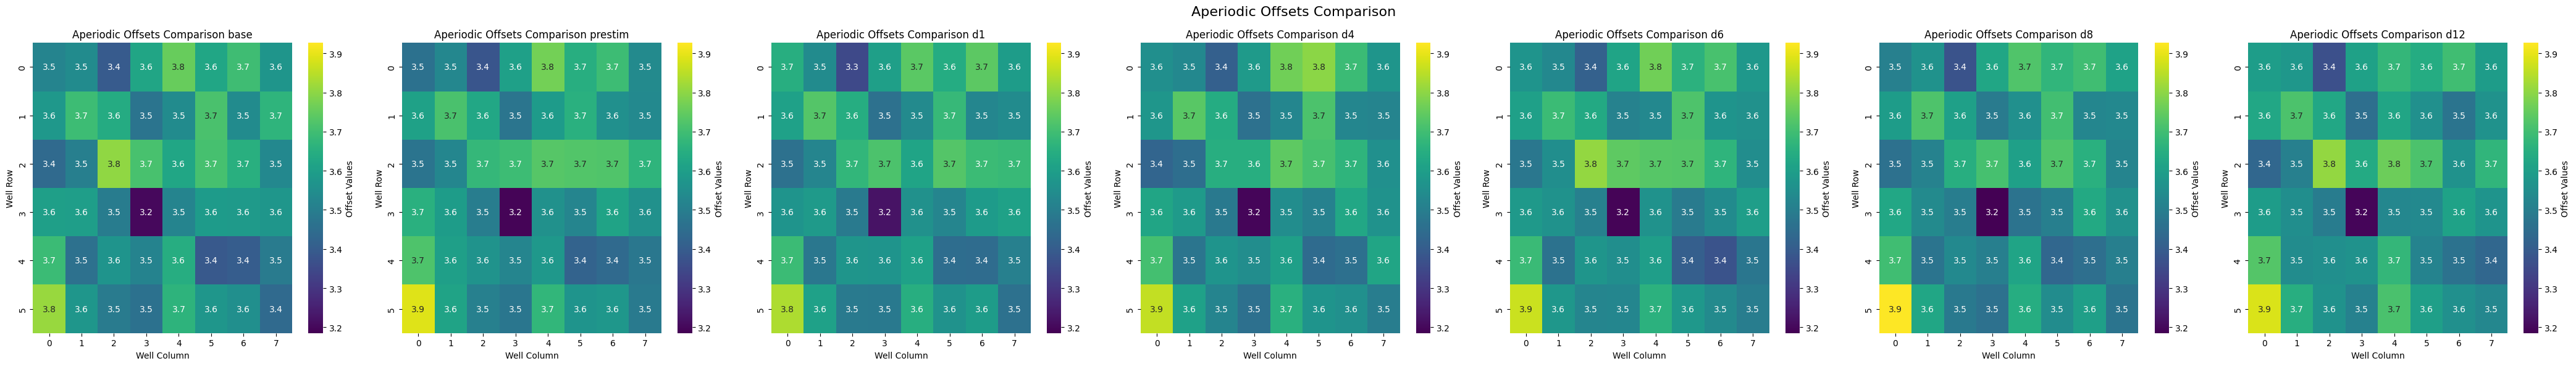

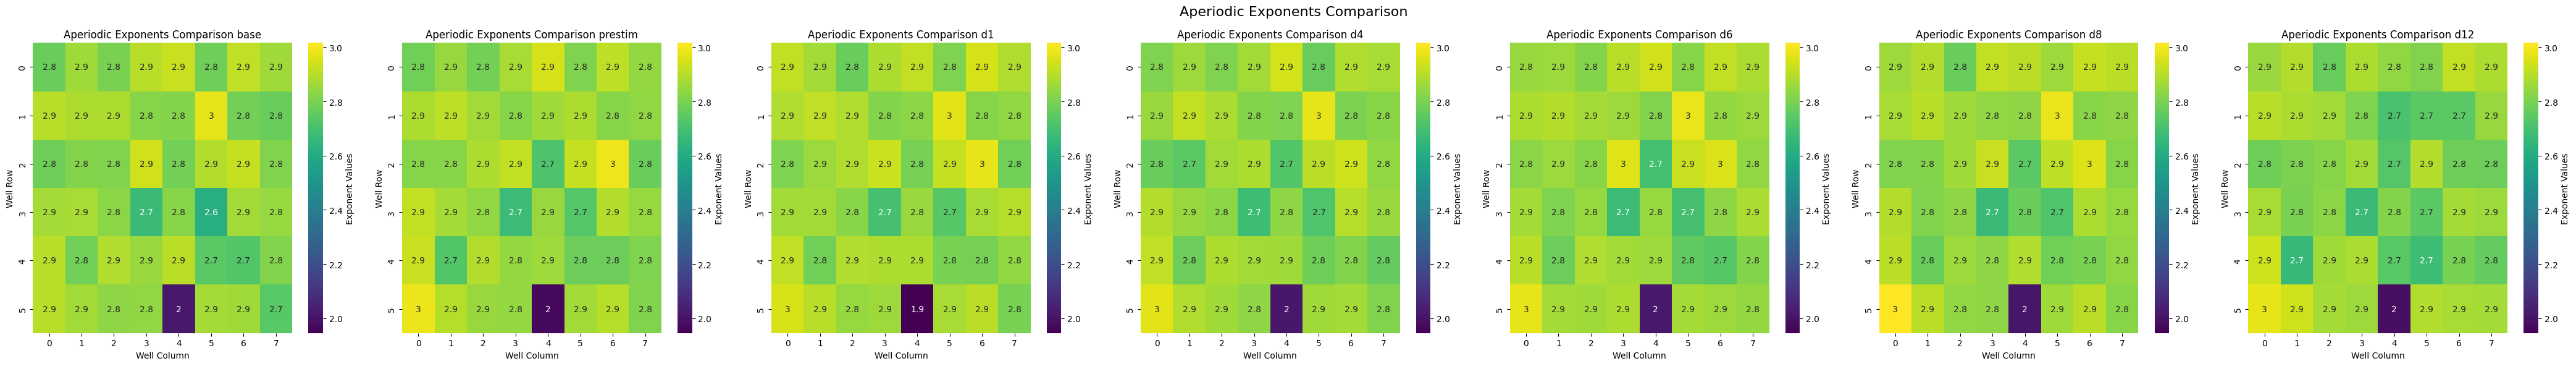

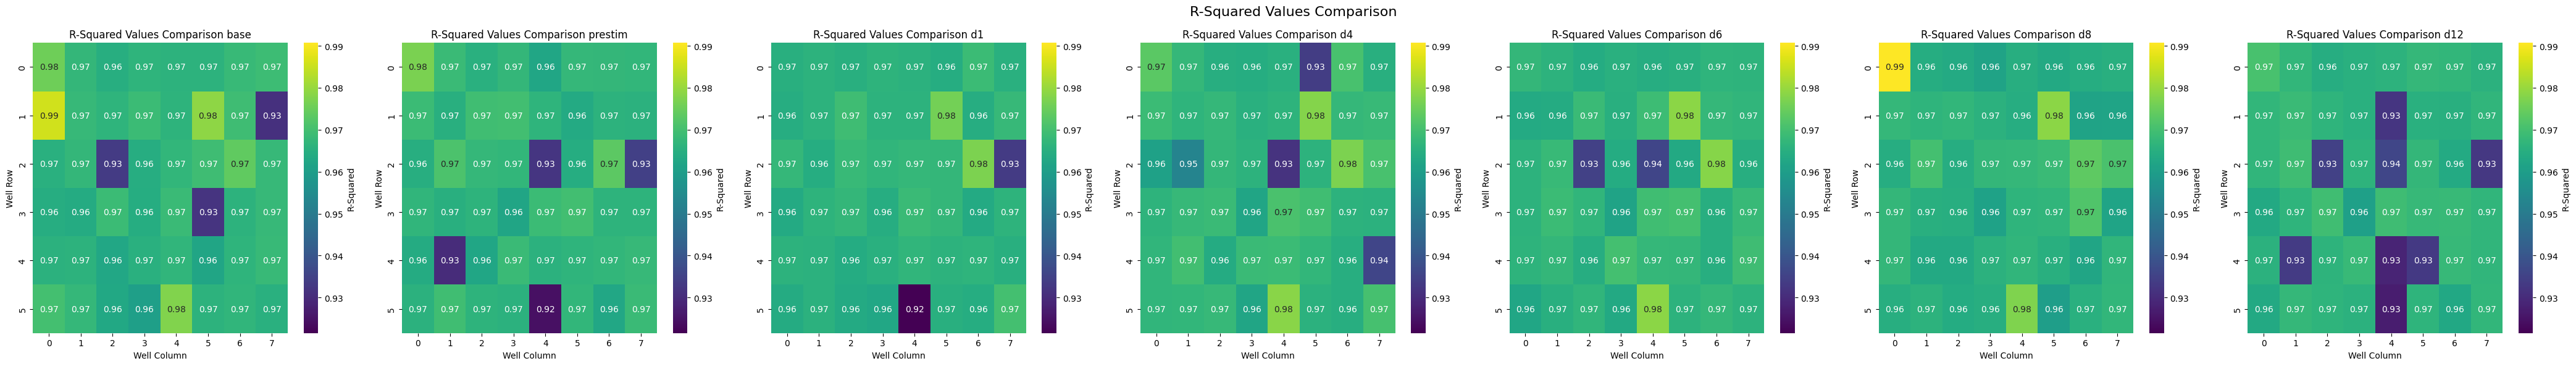

In [21]:
compare_param_heatmaps_across_files(fm_arrays, fmode = "fixed")

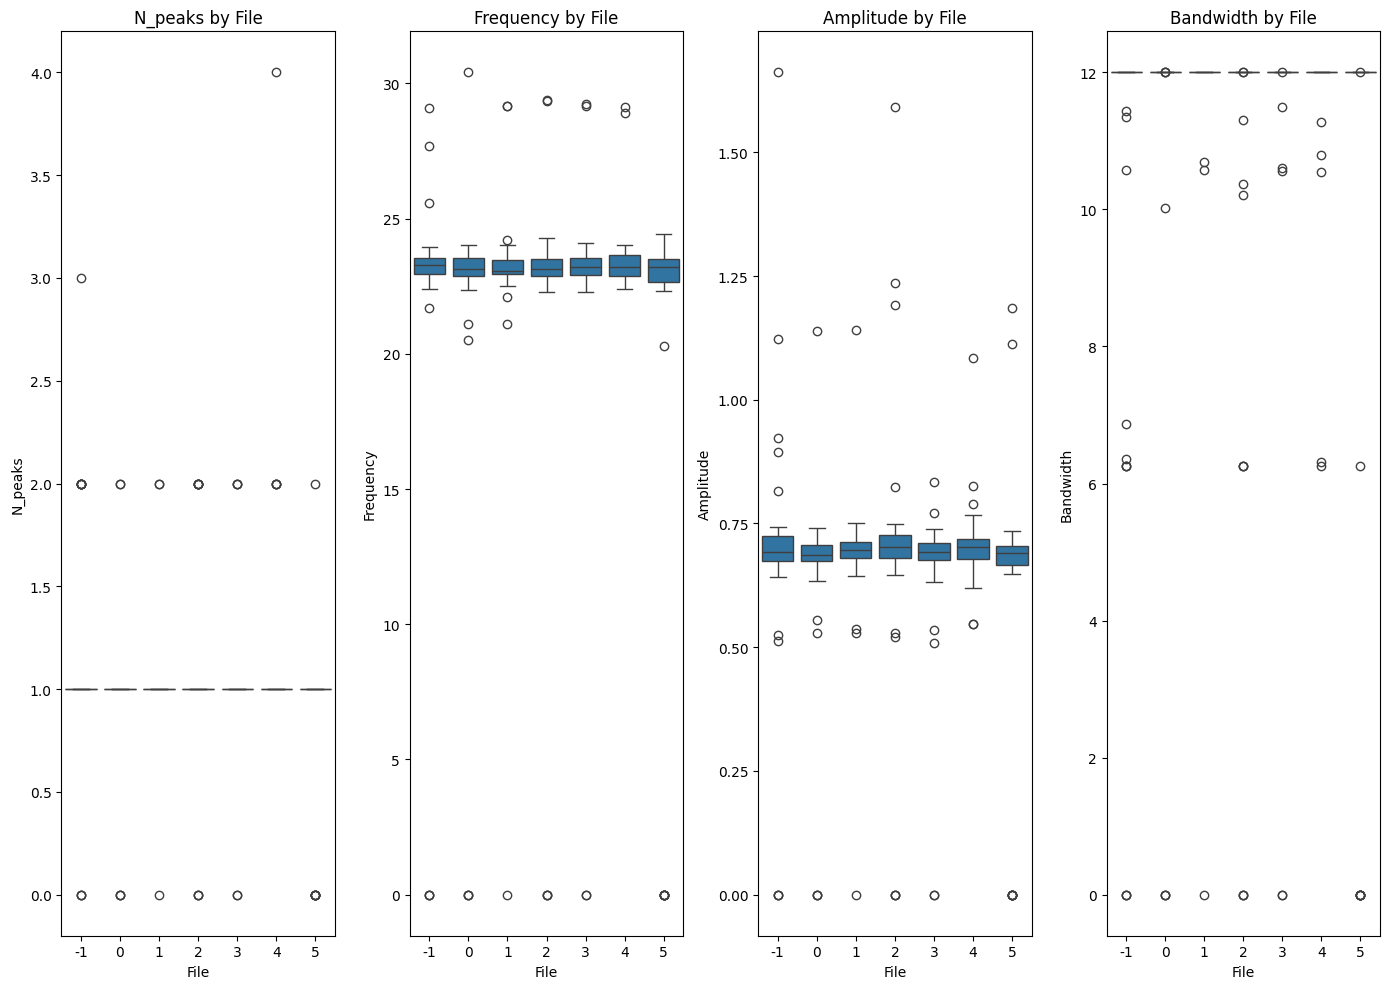

In [22]:
plot_peak_boxplot_across_files(fm_arrays)

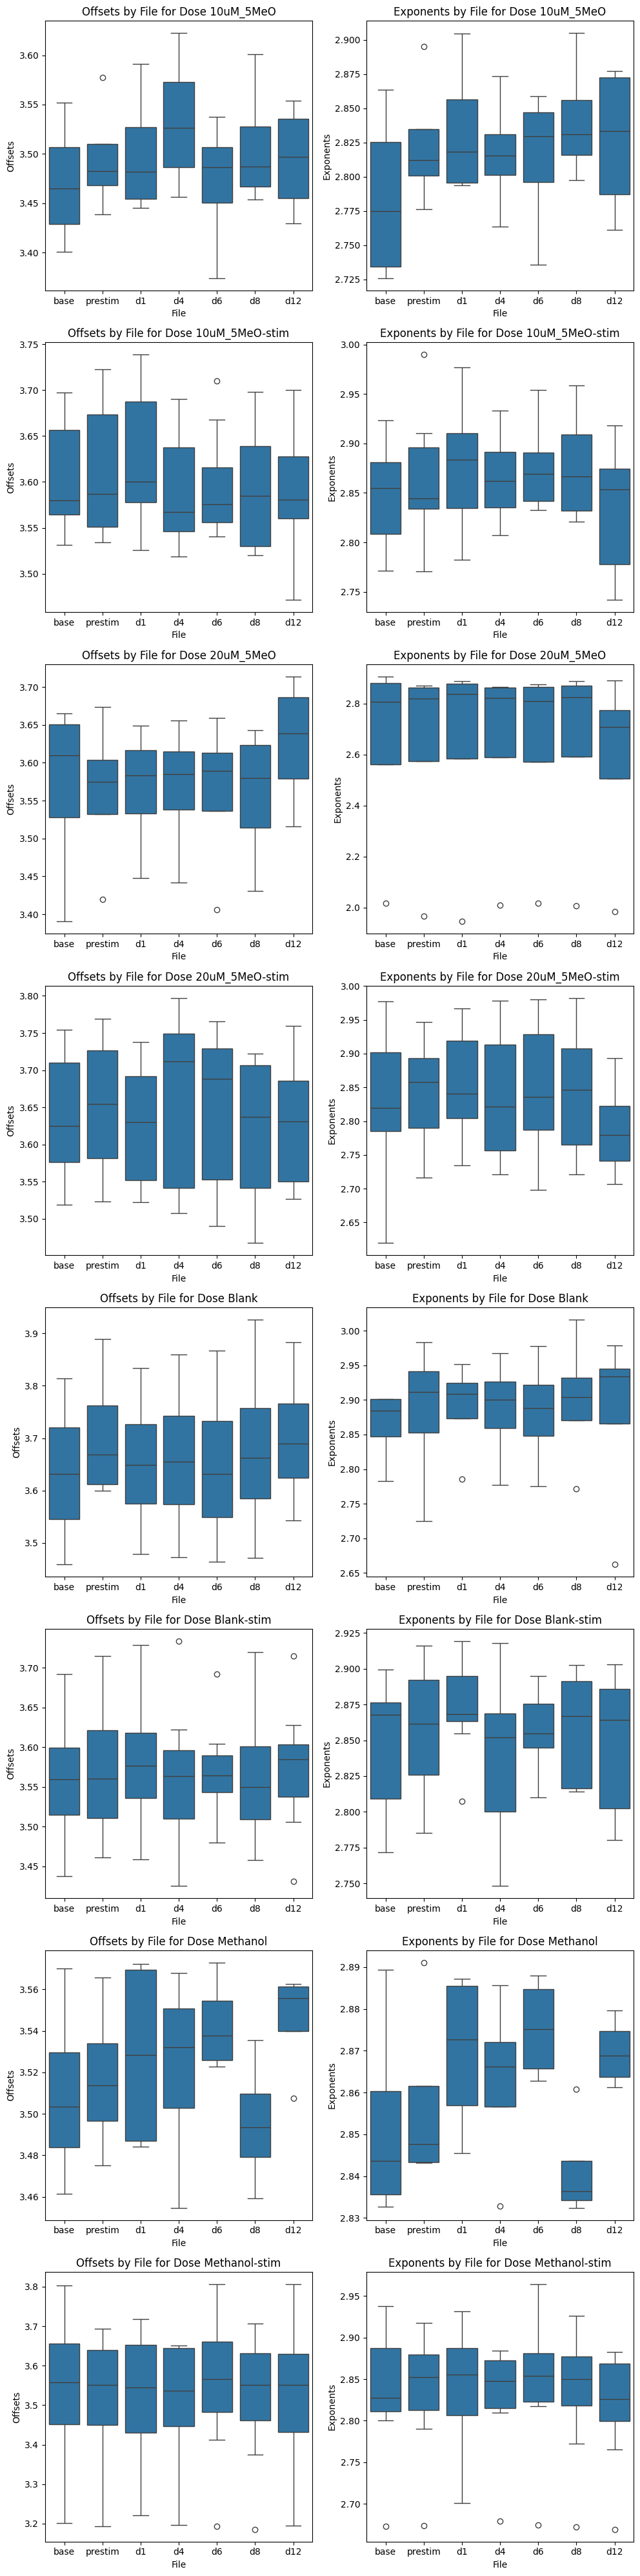

In [23]:
plot_aperiodic_boxplot_by_dose(fm_arrays, dose_grid, fmode = "fixed")

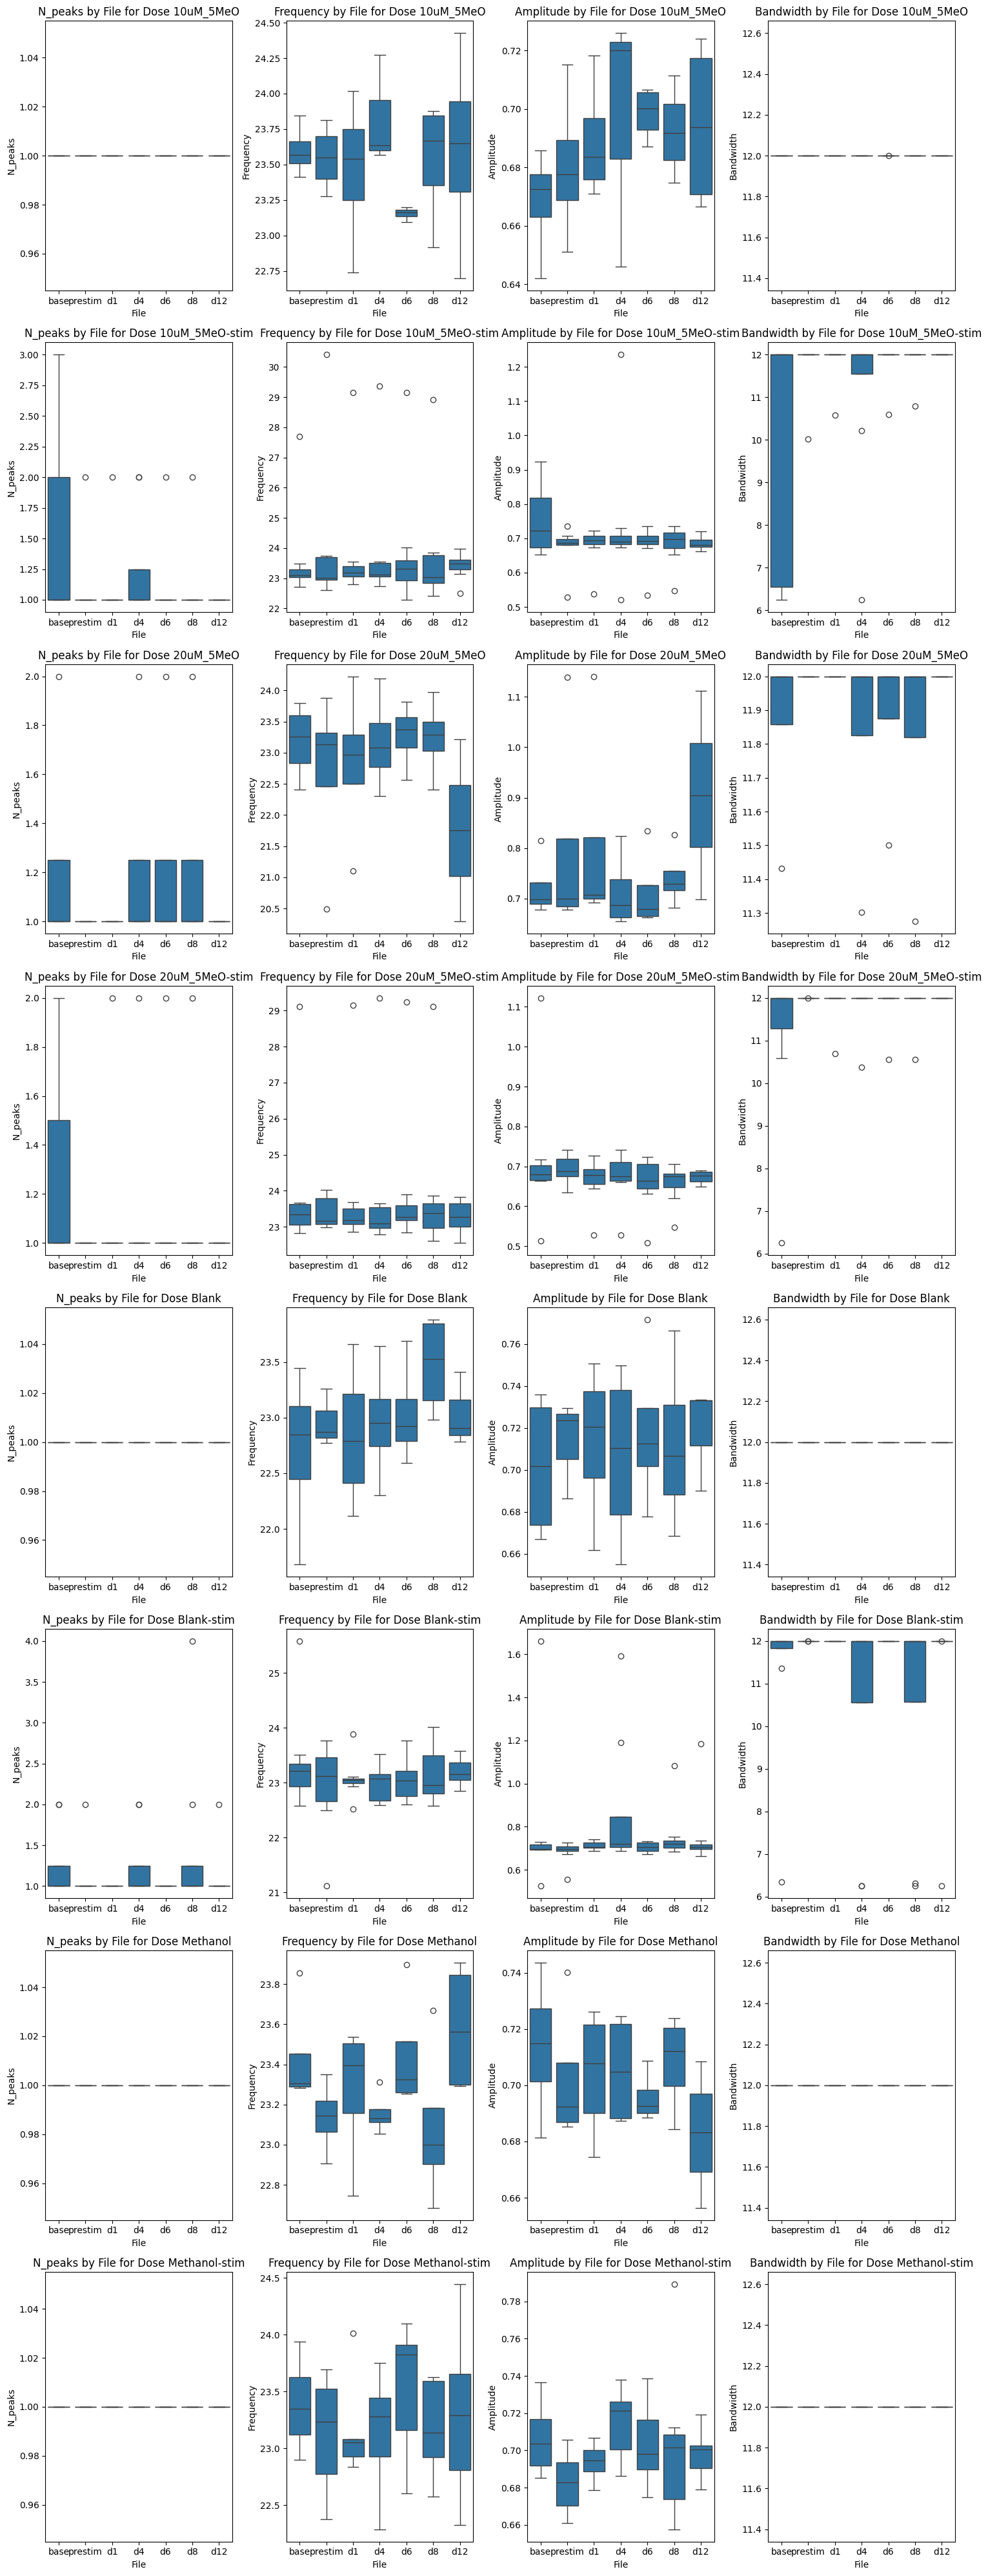

In [24]:
 plot_peak_boxplot_by_dose(fm_arrays, dose_grid)

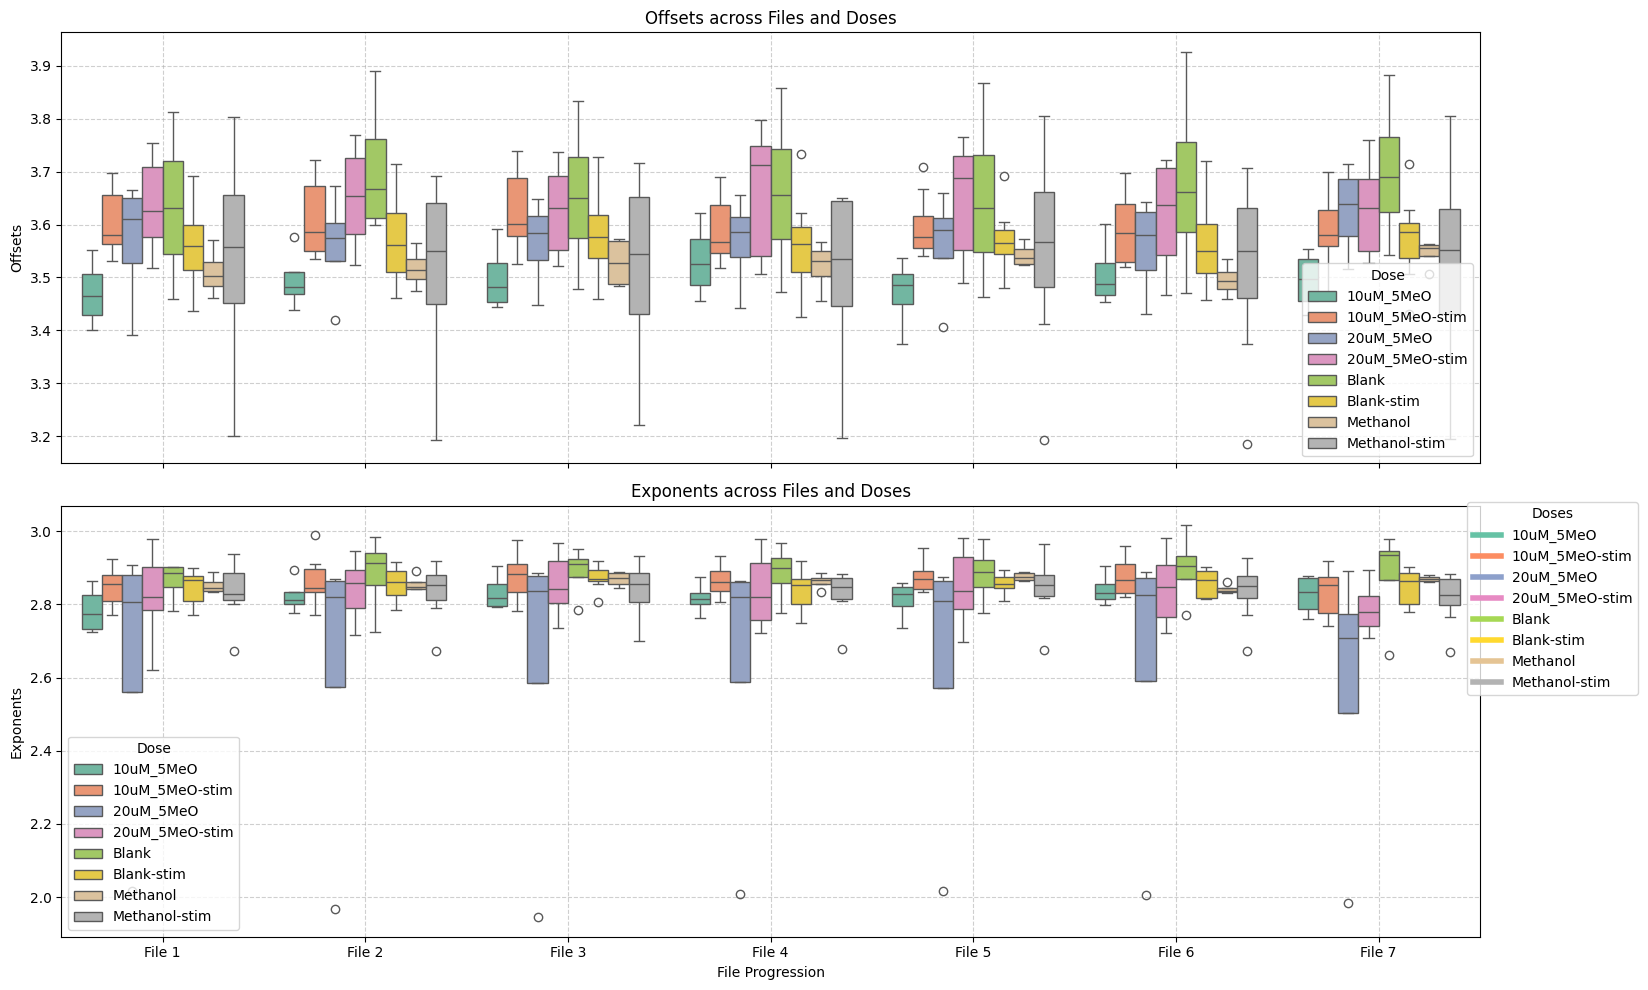

In [25]:
plot_consolidated_by_dose(fm_arrays, dose_grid, fmode = "fixed")